In [9]:
import pandas as pd
import cml.data_v1 as cmldata
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
CONNECTION_NAME = "default-impala"
conn = cmldata.get_connection(CONNECTION_NAME)

In [11]:
SQL_QUERY = "select * from default.hurricane"
df = conn.get_pandas_dataframe(SQL_QUERY)

In [18]:
def coordinate_mapping(x):
    x=x.astype('|S20')
    coord = float(x[:-1])
    if x[-1]=="W":
        coord *= -1
    if x[-1]=="S":
        coord *= -1
    return coord

In [46]:
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude), crs={'init' :'epsg:4326'})
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


/home/cdsw/.local/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


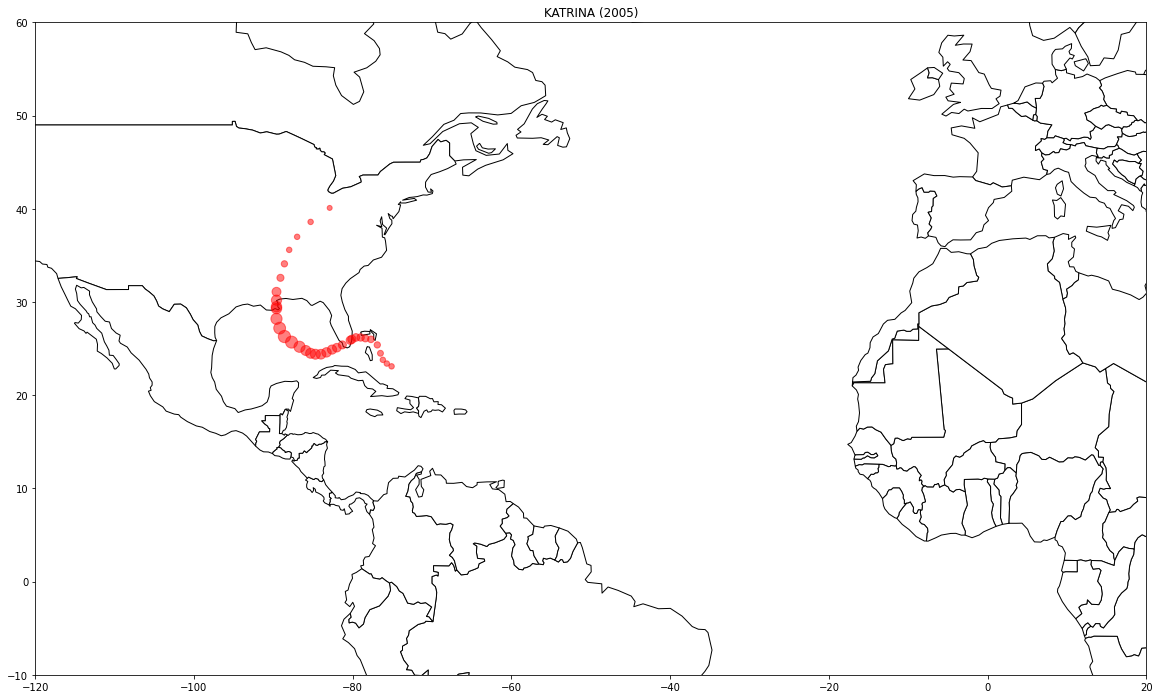

In [47]:
storm="AL122005"

ax = world.plot(color="white", edgecolor="black", figsize=(25,12))
_ = gdf[gdf["id"]==storm].plot(ax=ax, c="r", markersize="maximum_wind", alpha=0.5)
_ = plt.xlim(-120, 20)
_ = plt.ylim(-10, 60)
_ = plt.title(f'{gdf[gdf["id"]==storm].name.unique()[0]} ({gdf[gdf["id"]==storm].datetime.dt.year.unique()[0]})')

In [39]:
df[(df['name']=='KATRINA')]

,id,name,event,status,latitude,longitude,maximum_wind,minimum_pressure,low_wind_ne,low_wind_se,...,moderate_wind_ne,moderate_wind_se,moderate_wind_sw,moderate_wind_nw,high_wind_ne,high_wind_se,high_wind_sw,high_wind_nw,datetime,geometry
25013,AL211981,KATRINA,,TD,16.9,-81.2,25,1005,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1981-11-03 00:00:00,POINT (-81.20000 16.90000)
25014,AL211981,KATRINA,,TD,17.2,-81.3,25,1005,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1981-11-03 06:00:00,POINT (-81.30000 17.20000)
25015,AL211981,KATRINA,,TD,17.5,-81.4,25,1004,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1981-11-03 12:00:00,POINT (-81.40000 17.50000)
25016,AL211981,KATRINA,,TD,17.8,-81.4,30,1002,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1981-11-03 18:00:00,POINT (-81.40000 17.80000)
25017,AL211981,KATRINA,,TD,18.1,-81.4,30,1001,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1981-11-04 00:00:00,POINT (-81.40000 18.10000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34567,AL122005,KATRINA,,TS,34.1,-88.6,40,978,75,90,...,0,0,0,0,0,0,0,0,2005-08-30 06:00:00,POINT (-88.60000 34.10000)
34569,AL122005,KATRINA,,TD,35.6,-88.0,30,985,0,0,...,0,0,0,0,0,0,0,0,2005-08-30 12:00:00,POINT (-88.00000 35.60000)
34571,AL122005,KATRINA,,TD,37.0,-87.0,30,990,0,0,...,0,0,0,0,0,0,0,0,2005-08-30 18:00:00,POINT (-87.00000 37.00000)
34574,AL122005,KATRINA,,EX,38.6,-85.3,30,994,0,0,...,0,0,0,0,0,0,0,0,2005-08-31 00:00:00,POINT (-85.30000 38.60000)


In [35]:
df

,id,name,event,status,latitude,longitude,maximum_wind,minimum_pressure,low_wind_ne,low_wind_se,...,moderate_wind_ne,moderate_wind_se,moderate_wind_sw,moderate_wind_nw,high_wind_ne,high_wind_se,high_wind_sw,high_wind_nw,datetime,geometry
0,AL011901,UNNAMED,,TD,19.3,-82.3,25,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1901-06-11 00:00:00,POINT (-82.30000 19.30000)
1,AL011901,UNNAMED,,TD,20.0,-83.0,25,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1901-06-11 06:00:00,POINT (-83.00000 20.00000)
2,AL011901,UNNAMED,,TD,20.7,-83.5,30,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1901-06-11 12:00:00,POINT (-83.50000 20.70000)
3,AL011901,UNNAMED,,TD,21.4,-83.9,30,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1901-06-11 18:00:00,POINT (-83.90000 21.40000)
4,AL011901,UNNAMED,,TS,22.1,-84.3,35,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1901-06-12 00:00:00,POINT (-84.30000 22.10000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39568,AL122015,KATE,,EX,41.3,-50.4,55,981,220,220,...,120,120,60,0,0,0,0,0,2015-11-12 12:00:00,POINT (-50.40000 41.30000)
39569,AL122015,KATE,,EX,41.9,-49.9,55,983,220,220,...,120,120,60,0,0,0,0,0,2015-11-12 18:00:00,POINT (-49.90000 41.90000)
39570,AL122015,KATE,,EX,41.5,-49.2,50,985,540,520,...,120,120,60,0,0,0,0,0,2015-11-13 00:00:00,POINT (-49.20000 41.50000)
39571,AL122015,KATE,,EX,40.8,-47.5,45,985,620,460,...,0,0,0,0,0,0,0,0,2015-11-13 06:00:00,POINT (-47.50000 40.80000)
